<a href="https://colab.research.google.com/github/Meet2020mp/CE098_Meetkumar_Patel/blob/main/Lab5/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
data = np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded])
column_name = ['Outlook','Temperature','Humidity','Wind']
data_frm = pd.DataFrame(data=data,columns=column_name)
data_frm

,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [5]:
from sklearn.model_selection import train_test_split
x=data
y=Play_encoded
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)


In [6]:
#create a decision tree classifier
from sklearn import metrics

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [7]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[2, 0],
       [2, 3]])

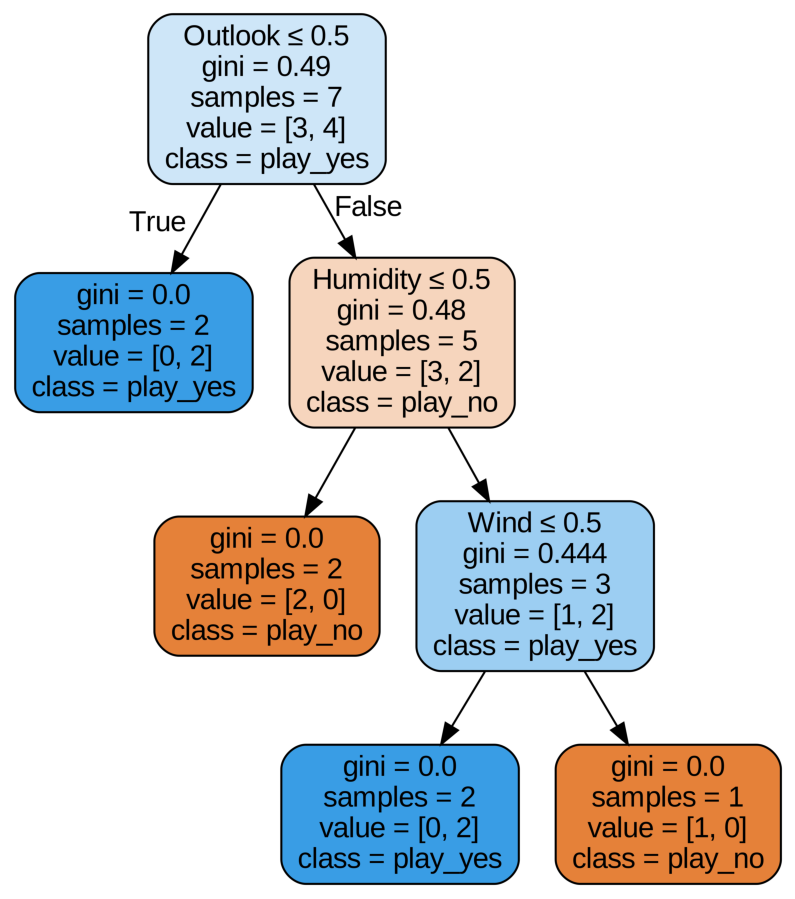

In [8]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=column_name,
                class_names=['play_no','play_yes'])

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


Excersice:

Question 1: -
What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

In [9]:
print(clf.predict([[1,2,1,0]]))

[1]


Question 2: -
What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity
=’High’, and Wind = ’True’?

In [10]:
print(clf.predict([[2,0,0,1]]))

[0]


Question 3:- Accuracy , precision and recall of both Models?

*   List item
*   List item



In [11]:
from sklearn.metrics import precision_score,recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision = precision_score(y_test,y_pred)
print("Precision: {}".format(precision))

recall = recall_score(y_test,y_pred)
print("Pred: {}".format(recall))

Accuracy: 0.7142857142857143
Precision: 1.0
Pred: 0.6


Task1: -
Try the algo on Same Weather dataset
- OneHotEncoding of features:and Train test Division 70%-30%


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

clf = DecisionTreeClassifier(random_state=4)

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


In [13]:
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[0, 0],
       [3, 2]])

Task 2: -
Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division
80%-20%


In [14]:
from sklearn import datasets

#load dataset
wine = datasets.load_wine()

In [15]:
print("feature name : ",wine.feature_names)
print("data shape :",wine.data.shape)
print("label name :",wine.target_names)

feature name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
data shape : (178, 13)
label name : ['class_0' 'class_1' 'class_2']


In [16]:
#import the necessary module
from sklearn.model_selection import train_test_split

x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4)

In [17]:

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


In [18]:
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)


confusion matrix : 



array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 10]])

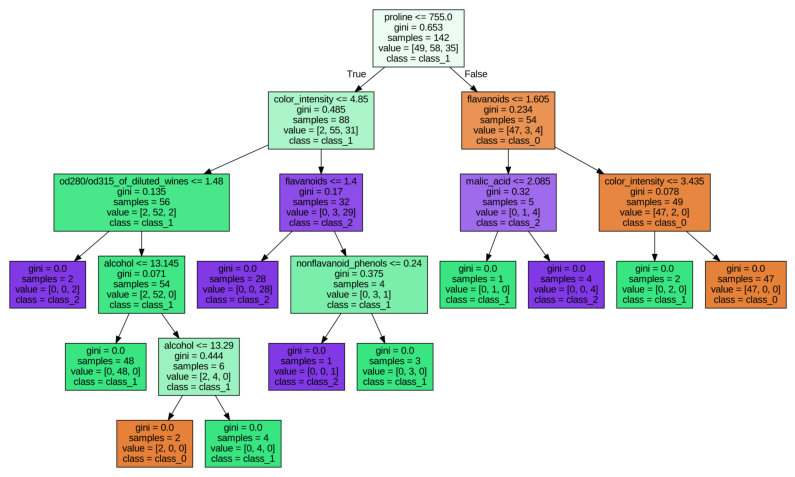

In [19]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='wine_tree.dot',feature_names=list(wine.feature_names),class_names=list(wine.target_names), filled=True)

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()